
# Fold 4

10 jets, #nofilter, PtEtaPhi network, restricted dataset

Create and train network

Using TensorFlow backend.


777150 total events found
sorting data by tag
287645
k-folding: every 5th element starting at 4
creating default model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 700)               21700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_

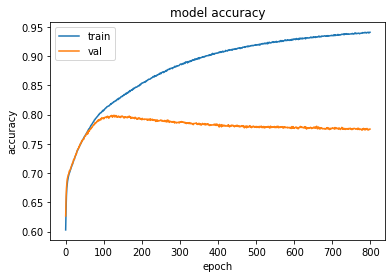

In [1]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="4"
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout
sys.path.append(os.path.realpath("../"))
import ptetaphi_nn
import tools

# get data file path
with open("/home/cmccracken/start_tf/bbb/filepath.txt", 'r') as f:
    filename = f.read()
    
s_table = tools.open_file(filename, sort_by="tag", pt_cut=40, eta_cut=2.5)

# filter for events with 3 b tags
nt3 = s_table.nbtags==3 
events = s_table[nt3]
print(len(events))

cutoff = 10  # not many events have >10 jets
# "pad" = ensure all events have same length, cut off ends if needed
events = tools.pad(events, cutoff)

# make and train network
nn = ptetaphi_nn.PtEtaPhiNN(events, chop=0, print_summary=True, fold=4)
nn.learn(epochs=800)

Evaluate network

100%|██████████| 57529/57529 [00:00<00:00, 75647.43it/s]


overall accuracy: 76.70 percent
ignoring 1.49 percent (860 events) of 57529 events


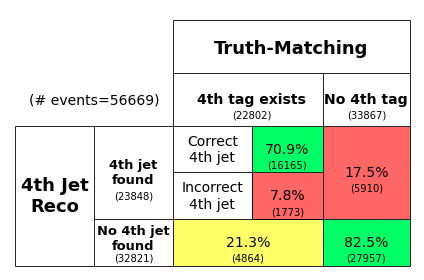

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [2]:
nn.evaluate(savename="fold_4")

Save model for use later

In [3]:
# save the architecture string to a file
models_dir = "/home/cmccracken/start_tf/bbb/models/"
with open(models_dir+'architecture_fold_4.json', 'w') as arch_file:
    arch_file.write(nn.model.to_json())
# now save the weights as an HDF5 file
nn.model.save_weights(models_dir+'weights_fold_4.h5')
# use nn_tester to get csv!